# Import data

In [111]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler


data_df = pd.read_csv('../data/2005_2009_curated.csv')
pred_df = pd.read_csv('../data/crash_amounts.csv')


# labels = [*list(data_df)[3:], "GISJOIN"]
labels = list(data_df)[3:]
print(labels)

# filtered_data_df = data_df.loc[data_df['GISJOIN'].isin(pred_df["GISJOIN"].to_list())]

X = []
for index, row in pred_df.iterrows():
    relevant_x = data_df.loc[data_df['GISJOIN'] == row["GISJOIN"]]
    X.append(relevant_x[labels].to_numpy().reshape(-1))
    
X = np.array(X)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
T = pred_df["crash_amount"].to_numpy()
# together = np.hstack((T.reshape(-1,1),X))
# new_improved_data = together[np.argsort(together[:, 0])][::-1][:250]

# T = new_improved_data[:,0].flatten()
# X = new_improved_data[:,1:]

['bachelors_degree', 'gini_index', 'median_household_income', 'median_age', 'white', 'black', 'native_american', 'asian', 'poverty', 'owned', 'occupied']


In [85]:
pred_df

,Unnamed: 0,county,GISJOIN,highest_price,lowest_price,crash_amount
0,0,Los Angeles County,G0600370,593553.0,369102.0,0.378148
1,1,Cook County,G1700310,309556.0,181506.0,0.413657
2,2,Harris County,G4802010,145755.0,128343.0,0.119461
3,3,Maricopa County,G0400130,311044.0,136708.0,0.560487
4,4,San Diego County,G0600730,574660.0,354517.0,0.383084
...,...,...,...,...,...,...
1289,1289,Echols County,G1301010,70523.0,53387.0,0.242985
1290,1290,Baker County,G1300070,61790.0,56433.0,0.086697
1291,1291,Webster County,G1303070,74038.0,55563.0,0.249534
1292,1292,Quitman County,G1302390,68732.0,53288.0,0.224699


In [112]:
X

array([[0.36560599, 0.60074627, 0.36951553, ..., 0.34971647, 0.39517528,
        0.94909298],
       [0.43278054, 0.58955224, 0.35954378, ..., 0.34094968, 0.57304347,
        0.87823497],
       [0.35693758, 0.59328358, 0.32360234, ..., 0.38342804, 0.5263045 ,
        0.86477087],
       ...,
       [0.04520193, 0.37686567, 0.04828486, ..., 0.45236655, 0.75211481,
        0.70262291],
       [0.12498241, 0.39179104, 0.1124814 , ..., 0.43841189, 0.77395562,
        0.3910684 ],
       [0.0423496 , 0.76492537, 0.00609086, ..., 0.87502746, 0.72488951,
        0.56901592]])

In [113]:
corr_thing = pd.DataFrame(list(np.hstack((T.reshape(-1,1),X))), columns=["target",*labels])
corr_thing.corr()

,target,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied
target,1.000000,0.124209,0.000347,0.239611,-0.065864,-0.255700,0.130537,-0.038278,0.239314,-0.118875,-0.080545,-0.016982
bachelors_degree,0.124209,1.000000,0.117112,0.755210,-0.219708,-0.034941,-0.099572,-0.091666,0.499469,-0.548636,-0.245235,0.231979
gini_index,0.000347,0.117112,1.000000,-0.348433,-0.062901,-0.370678,0.361301,0.007770,0.063800,0.533554,-0.479488,-0.166792
median_household_income,0.239611,0.755210,-0.348433,1.000000,-0.112864,0.081119,-0.223760,-0.116339,0.487489,-0.823009,0.132555,0.348008
median_age,-0.065864,-0.219708,-0.062901,-0.112864,1.000000,0.370931,-0.226984,-0.040012,-0.240698,-0.151181,0.534966,-0.412983
white,-0.255700,-0.034941,-0.370678,0.081119,0.370931,1.000000,-0.863247,-0.145554,-0.321123,-0.370771,0.520259,-0.035816
black,0.130537,-0.099572,0.361301,-0.223760,-0.226984,-0.863247,1.000000,-0.127701,-0.020073,0.420508,-0.356035,-0.026410
native_american,-0.038278,-0.091666,0.007770,-0.116339,-0.040012,-0.145554,-0.127701,1.000000,-0.032180,0.134511,-0.019802,-0.125205
asian,0.239314,0.499469,0.063800,0.487489,-0.240698,-0.321123,-0.020073,-0.032180,1.000000,-0.258238,-0.349070,0.235174
poverty,-0.118875,-0.548636,0.533554,-0.823009,-0.151181,-0.370771,0.420508,0.134511,-0.258238,1.000000,-0.334185,-0.247024


In [114]:
np.hstack((T.reshape(-1,1),X))[166]

array([0.35672999, 0.45579167, 0.35820896, 0.38094263, 0.34076433,
       0.90376619, 0.01402637, 0.0124673 , 0.05342171, 0.19321445,
       0.70911845, 0.94120042])

In [115]:
linreg = LinearRegression()
linreg.fit(X,T)
Y = linreg.predict(X)
linreg.score(X,T)

0.22081788391839707

In [116]:
np.sqrt(np.mean((Y-T)**2))

0.11104887074666445

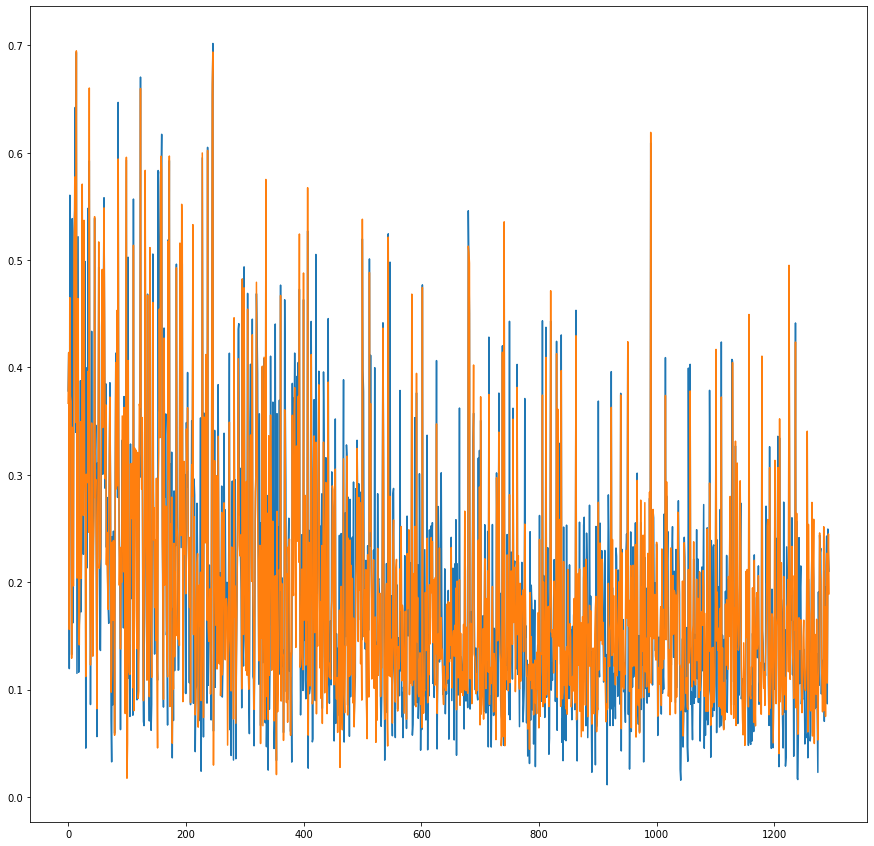

In [131]:
plt.figure(figsize=(15,15))
plt.plot(T[:])
plt.plot(Y[:]);

In [118]:
linreg.coef_

array([-0.22724215,  0.08725033,  0.42121802,  0.03460138, -0.65493255,
       -0.49487793, -0.48643546, -0.33103598, -0.04167748, -0.04192607,
       -0.1476969 ])

In [119]:
linreg.intercept_

0.8486804075309239

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [121]:
X.shape

(1294, 11)

In [138]:
model = keras.Sequential(
    [
        keras.Input(shape=(11,)),
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(64, activation="relu", name="layer2"),
        layers.Dense(32, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                384       
                                                                 
 layer2 (Dense)              (None, 64)                2112      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 out (Dense)                 (None, 1)                 33        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [139]:
n_epochs = 10
history1 = model.fit(X[:600], T[:600].reshape(-1,1), batch_size=64, epochs=n_epochs, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0145


In [140]:
Y = model.predict(X[600:])

In [141]:
np.sqrt(np.mean((Y-T[600:].reshape(-1,1))**2))

0.15121829157856456

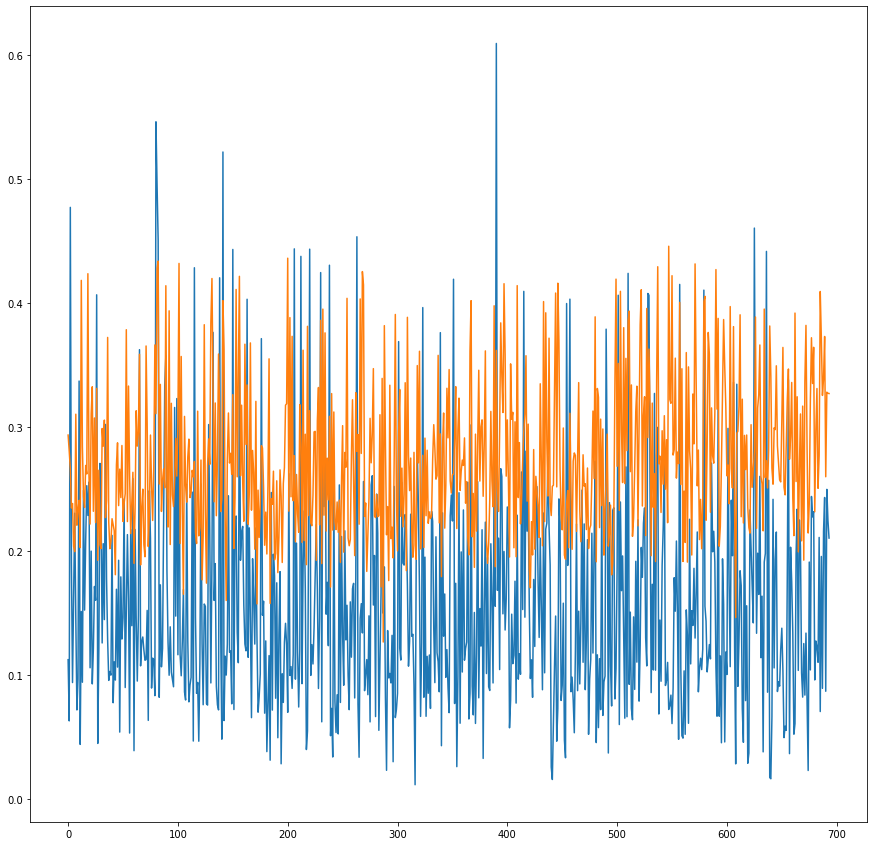

In [142]:
plt.figure(figsize=(15,15))
plt.plot(T[600:])
plt.plot(Y);